# Sentiment Analysis of the British Airways Customers' Feedback

## Data Overview

In [3]:
# import the libraries and data
import pandas as pd
import numpy as np
import nltk

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

# set plot style
sns.set_theme()

In [4]:
# import the dataset
df = pd.read_csv("reviewdata.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   verify             2092 non-null   object
 1   review             2475 non-null   object
 2   date               2500 non-null   object
 3   country            2500 non-null   object
 4   seat_type          2500 non-null   object
 5   recommended        2500 non-null   object
 6   stars              2500 non-null   int64 
 7   departure          2500 non-null   object
 8   arrival            2500 non-null   object
 9   type_of_traveller  2500 non-null   object
dtypes: int64(1), object(9)
memory usage: 195.4+ KB


In [5]:
# drop empty rows in the review column
df = df.dropna(subset = ["review"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2475 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   verify             2067 non-null   object
 1   review             2475 non-null   object
 2   date               2475 non-null   object
 3   country            2475 non-null   object
 4   seat_type          2475 non-null   object
 5   recommended        2475 non-null   object
 6   stars              2475 non-null   int64 
 7   departure          2475 non-null   object
 8   arrival            2475 non-null   object
 9   type_of_traveller  2475 non-null   object
dtypes: int64(1), object(9)
memory usage: 212.7+ KB


In [6]:
df.head()

,verify,review,date,country,seat_type,recommended,stars,departure,arrival,type_of_traveller
0,Trip Verified,I had the most fantastic BA Flight today. The ...,1st August 2023,Hong Kong,Business CLas Vegass,yes,5,Heathrow,Las Vegas,Family Leisure
1,Trip Verified,Couldn't book in online. Arrived at check in t...,31st July 2023,United Kingdom,Economy CLas Vegass,no,3,Rome,Heathrow,Solo Leisure
2,Trip Verified,London Heathrow to Mumbai in a Boeing 787-8 in...,31st July 2023,Iceland,Business CLas Vegass,yes,3,Gatwick,Venice,Solo Leisure
3,Trip Verified,"Keflavík, Iceland to London Heathrow on an A32...",31st July 2023,Iceland,Business CLas Vegass,yes,5,London,Luanda,Couple Leisure
4,Trip Verified,Terrible Experience with British Airways. I bo...,29th July 2023,Canada,Economy CLas Vegass,no,5,Denver,Heathrow,Family Leisure


In [57]:
# correct the class types in the seat_type columns

df["seat_type"] = df["seat_type"].replace({"Business CLas Vegass": "Business Class", "Economy CLas Vegass": "Economy Class", "First CLas Vegass": "First Class"})
df["seat_type"].unique()

# make the corrections in the review column also
df["review"] = df["review"].str.replace(r"(?i)clas vegass", "Class", regex=True)

## Basic Data Exploration

In [9]:
# Explore review by seat type
df["seat_type"].value_counts()

seat_type
Economy Class      1351
Business Class      745
Premium Economy     245
First Class         134
Name: count, dtype: int64

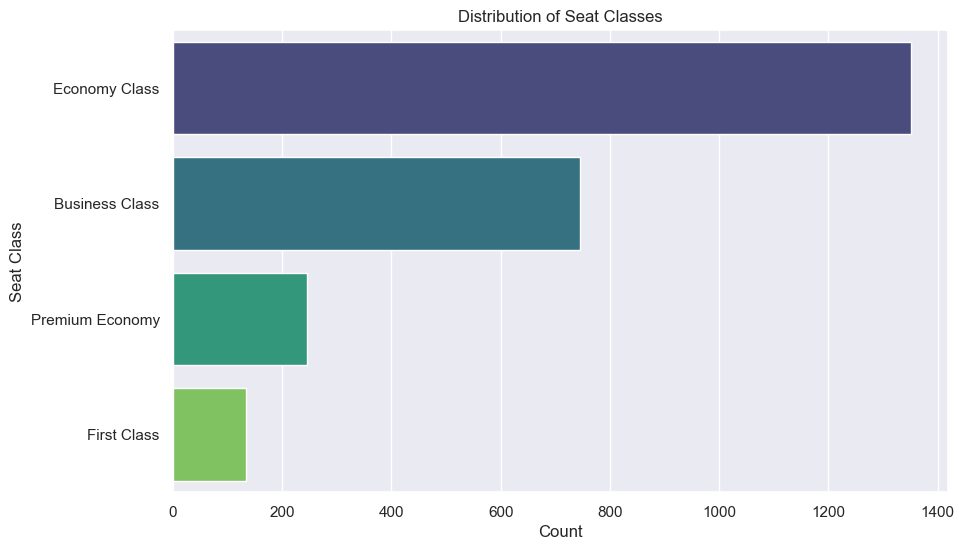

In [10]:
# a plot showing the seat types
plt.figure(figsize=(10, 6))
sns.countplot(y=df["seat_type"], order=df["seat_type"].value_counts().index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Seat Class")
plt.title("Distribution of Seat Classes")
plt.show()

In [11]:
#Explore data by traveller type
df["type_of_traveller"].value_counts()

type_of_traveller
Couple Leisure    991
Family Leisure    499
Business          493
Solo Leisure      492
Name: count, dtype: int64

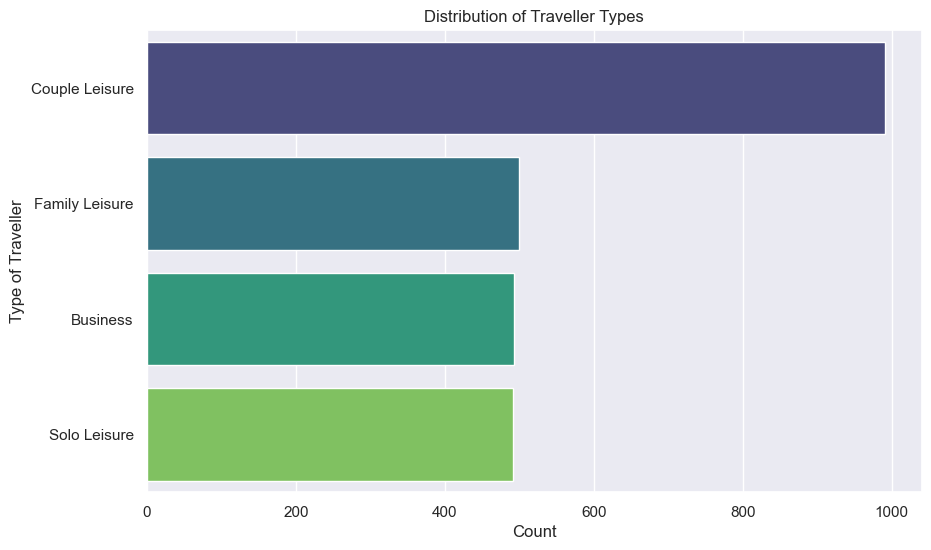

In [12]:
# a plot showing the different types of travellers
plt.figure(figsize=(10, 6))
sns.countplot(y=df["type_of_traveller"], order=df["type_of_traveller"].value_counts().index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Type of Traveller")
plt.title("Distribution of Traveller Types")
plt.show()

In [13]:
# the most frequent destination
df["arrival"].value_counts()

arrival
Heathrow     497
LHR          493
Las Vegas    249
Luanda       249
Tampa        249
Sydney       248
Venice       245
CPT          245
Name: count, dtype: int64

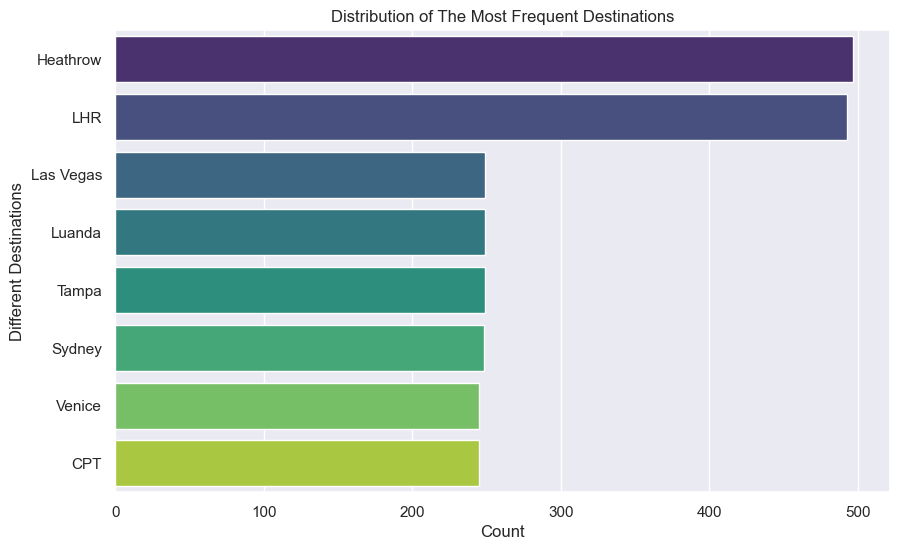

In [14]:
# a plot showing the different destinations
plt.figure(figsize=(10, 6))
sns.countplot(y=df["arrival"], order=df["arrival"].value_counts().index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Different Destinations")
plt.title("Distribution of The Most Frequent Destinations")
plt.show()

## Data Preparation for Key Topic Extraction and Sentiment Analysis

In [16]:
## Preprocess text for analysis

from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [17]:
# Create a preprocess function
def preprocess_text(text):
    text = re.sub(r'\W', ' ', str(text))  # to remove special characters
    text = text.lower()  # to convert to lowercase
    text = " ".join(word for word in text.split() if word not in stop_words)  # to remove stopwords
    return text

In [18]:
# replace review column with a preprocessed column
df["cleaned_review"] = df["review"].apply(preprocess_text)

## Key Topic Extraction

In [20]:
# import vectorizer and LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [21]:
# converting text to document-term matrix
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df["cleaned_review"])

In [22]:
# LDA for topic extraction
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [23]:
# Display top words for each topic
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Topic {i+1}: ", [words[j] for j in topic.argsort()[-10:]])

Topic 1:  ['london', 'cabin', 'class', 'good', 'seat', 'crew', 'service', 'food', 'ba', 'flight']
Topic 2:  ['booked', 'hours', 'told', 'service', 'customer', 'airways', 'british', 'london', 'ba', 'flight']
Topic 3:  ['london', 'customer', 'pay', 'airways', 'british', 'heathrow', 'service', 'seat', 'ba', 'airline']
Topic 4:  ['baggage', 'london', 'seats', 'ba', 'staff', 'bag', 'flight', 'boarding', 'luggage', 'check']
Topic 5:  ['got', 'said', 'plane', 'flight', 'seats', 'luggage', 'asked', 'london', 'ba', 'staff']


In [24]:
## Display Topics in a Word Cloud

In [25]:
from wordcloud import WordCloud

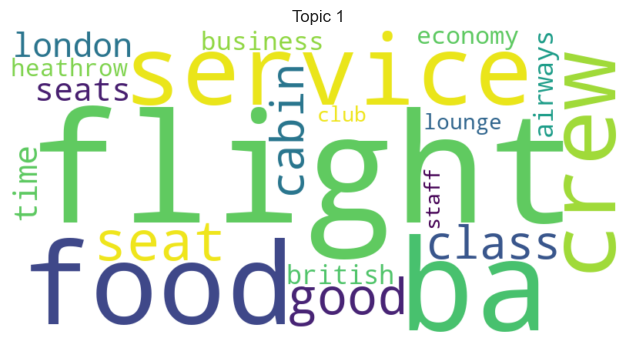

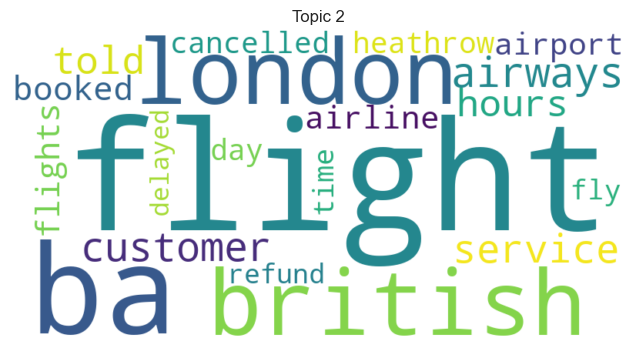

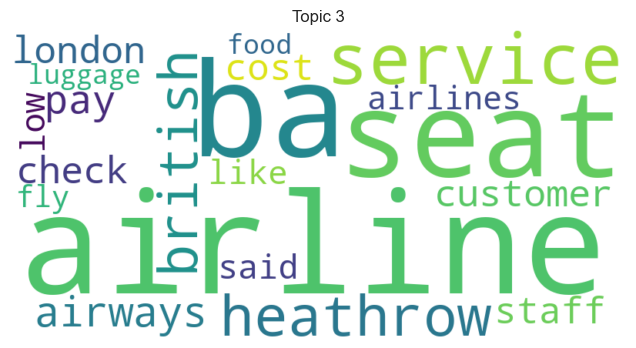

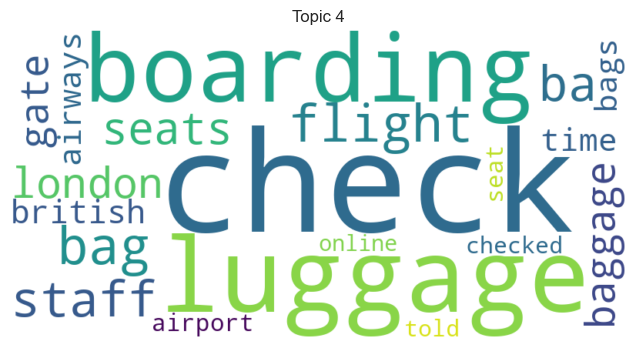

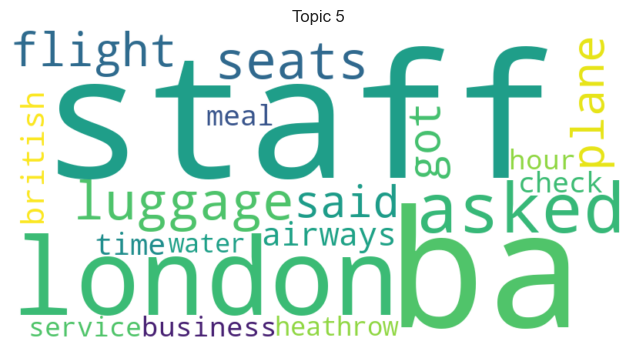

In [26]:
# Loop through each topic
for i, topic in enumerate(lda.components_):
    # Create a dictionary of words and their importance
    word_freq = {words[j]: topic[j] for j in topic.argsort()[-20:]}  # Top 20 words
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    
    # Plot the word cloud
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {i+1}")
    plt.show()


## Topics by Arrival Region

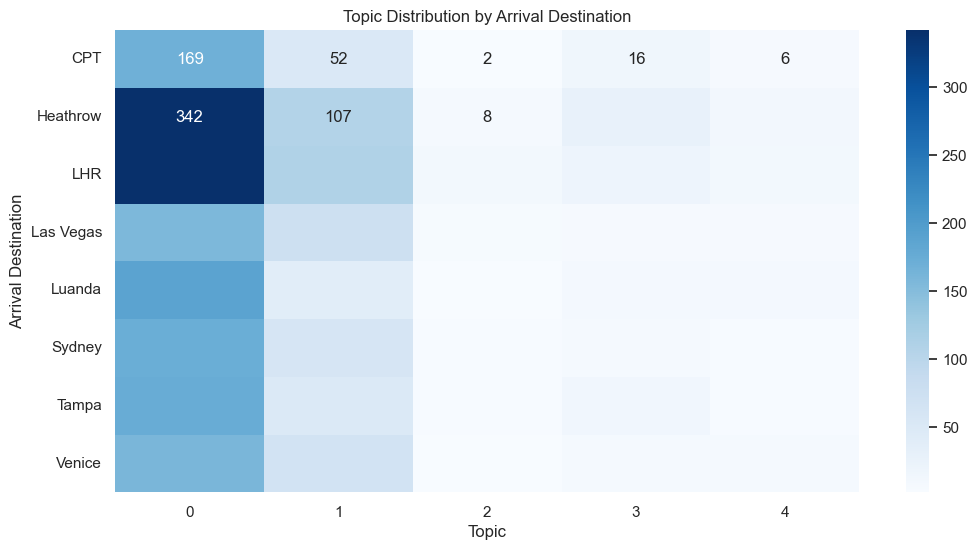

In [52]:
# Convert reviews into a document-term matrix using your vectorizer
review_matrix = vectorizer.transform(df['cleaned_review'])

# Predict topics for each review
topic_probabilities = lda.transform(review_matrix)
df['dominant_topic'] = topic_probabilities.argmax(axis=1)

# Count topics per destination
topic_counts = df.groupby(['arrival', 'dominant_topic']).size().reset_index(name='count')

# Pivot table for heatmap
pivot_table = topic_counts.pivot(index='arrival', columns='dominant_topic', values='count').fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="Blues", annot=True, fmt=".0f")
plt.title("Topic Distribution by Arrival Destination")
plt.xlabel("Topic")
plt.ylabel("Arrival Destination")
plt.show()


## Topics by Seat Class

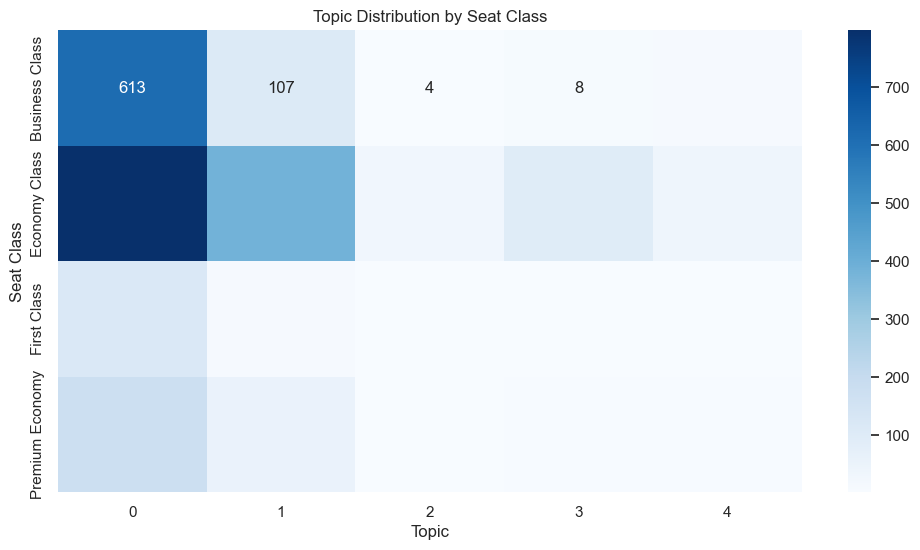

In [55]:
# Count topics per seat class
topic_counts = df.groupby(['seat_type', 'dominant_topic']).size().reset_index(name='count')

# Pivot table for heatmap
pivot_table = topic_counts.pivot(index='seat_type', columns='dominant_topic', values='count').fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="Blues", annot=True, fmt=".0f")
plt.title("Topic Distribution by Seat Class")
plt.xlabel("Topic")
plt.ylabel("Seat Class")
plt.show()